<a href="https://colab.research.google.com/github/YasirAhmadX/DL/blob/main/DL_Lab8_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Lab-8 (Attention Mechanism)


---


> Yasir Ahmad  
> 22MIA1064



# LSTM with Attention


Implementing LSTM with Attention

> Attention finds out important features using LSTM (or GRU). Attention cannot be use independently.

## import libraries

In [35]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, LSTM, Dense, Activation, Layer

import numpy as np

## 1. Load dataset

In [36]:
vocab_size = 1000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

In [37]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

## 2. Padding sequences

In [38]:
x_train = pad_sequences(x_train, maxlen = max_len, padding = 'post')
x_test = pad_sequences(x_test, maxlen = max_len, padding = 'post')

In [39]:
x_train

array([[  5,  25, 100, ...,  19, 178,  32],
       [  1, 194,   2, ...,   0,   0,   0],
       [  1,  14,  47, ...,   0,   0,   0],
       ...,
       [  1,  11,   6, ...,   0,   0,   0],
       [  1,   2,   2, ...,   0,   0,   0],
       [  1,  17,   6, ...,   0,   0,   0]], dtype=int32)

## 3. Define input layer

In [40]:
input_layer = tf.keras.layers.Input(shape = (max_len,))

## 4. Embedding layer

In [41]:
embedding = Embedding(input_dim = vocab_size, output_dim = 256, input_length = max_len)(input_layer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## 5. LSTM layer

In [42]:
lstm_output = LSTM(64, return_sequences = True)(embedding)

## 6. Attention layer

In [43]:
class AttentionLayer(Layer):
  def __init__(self, **kwargs):
    super(AttentionLayer, self).__init__(**kwargs)

    self.w = tf.keras.layers.Dense(32, activation = 'tanh')
    self.v = tf.keras.layers.Dense(1, activation = None)

  def call(self, lstm_output):
    w = self.w(lstm_output)
    v = self.v(w)

    attention_scores = tf.nn.softmax(v, axis = 1)
    context_vector = tf.reduce_sum(attention_scores*lstm_output, axis = 1)

    return context_vector

In [44]:
context_vector = AttentionLayer()(lstm_output)

## 7. Fully connected layer

In [45]:
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(context_vector)

## 8. Model compilation
set loss and objective funtion

In [46]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## 9. Model Training

In [47]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6829 - loss: 0.5650 - val_accuracy: 0.8476 - val_loss: 0.3451
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8497 - loss: 0.3435 - val_accuracy: 0.8565 - val_loss: 0.3292
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8762 - loss: 0.2997 - val_accuracy: 0.8673 - val_loss: 0.3056
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8836 - loss: 0.2813 - val_accuracy: 0.8618 - val_loss: 0.3189
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8903 - loss: 0.2644 - val_accuracy: 0.8739 - val_loss: 0.2984
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8957 - loss: 0.2539 - val_accuracy: 0.8746 - val_loss: 0.2977
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9003 - loss: 0.2424 - val_accuracy: 0.8641 - val_loss: 0.3234
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9119 - loss: 0.2239 - val_ac

## 10. Testing

In [48]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8625 - loss: 0.3400
Test Loss: 0.33298105001449585
Test Accuracy: 0.866159975528717


In [49]:
lstm_metrics = (test_loss,test_acc)

# GRU with Attention


Implementing GRU with Attention

> only model architecture needs to be chnages

In [50]:
from tensorflow.keras.layers import GRU

## Model

In [51]:
input_layer = tf.keras.layers.Input(shape = (max_len,))
embedding = Embedding(input_dim = vocab_size, output_dim = 256, input_length = max_len)(input_layer)
GRU_output = GRU(64, return_sequences = True)(embedding)
context_vector = AttentionLayer()(GRU_output)
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(context_vector)

## Model compilation

In [52]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Model training

In [53]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.6864 - loss: 0.5655 - val_accuracy: 0.8490 - val_loss: 0.3463
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8624 - loss: 0.3238 - val_accuracy: 0.8635 - val_loss: 0.3149
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8695 - loss: 0.3027 - val_accuracy: 0.8599 - val_loss: 0.3222
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8860 - loss: 0.2753 - val_accuracy: 0.8696 - val_loss: 0.3097
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8930 - loss: 0.2628 - val_accuracy: 0.8744 - val_loss: 0.2978
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9000 - loss: 0.2454 - val_accuracy: 0.8706 - val_loss: 0.3099
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9019 - loss: 0.2440 - val_accuracy: 0.8712 - val_loss: 0.3076
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9094 - loss: 0.2232 - val_accu

## Testing

In [54]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8604 - loss: 0.3411
Test Loss: 0.33281418681144714
Test Accuracy: 0.8638799786567688


In [55]:
gru_metrics = (test_loss,test_acc)

# BiLSTM with Attention

In [56]:
from tensorflow.keras.layers import Bidirectional

## Model

In [57]:
input_layer = tf.keras.layers.Input(shape=(max_len,))
embedding = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len)(input_layer)
# Using Bidirectional LSTM
bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(embedding)
context_vector = AttentionLayer()(bilstm_output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(context_vector)

## Model compilation

In [58]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training

In [59]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.6931 - loss: 0.5497 - val_accuracy: 0.8528 - val_loss: 0.3366
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8570 - loss: 0.3308 - val_accuracy: 0.8638 - val_loss: 0.3160
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8702 - loss: 0.3063 - val_accuracy: 0.8703 - val_loss: 0.3024
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8858 - loss: 0.2779 - val_accuracy: 0.8757 - val_loss: 0.2951
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8982 - loss: 0.2529 - val_accuracy: 0.8759 - val_loss: 0.2936
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9002 - loss: 0.2431 - val_accuracy: 0.8692 - val_loss: 0.3026
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9094 - loss: 0.2225 - val_accuracy: 0.8719 - val_loss: 0.3049
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9189 - loss: 0.2096 - val_

## Testing

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8622 - loss: 0.3585
Test Loss: 0.34975922107696533
Test Accuracy: 0.8652399778366089


In [61]:
bilstm_metrics = (test_loss,test_acc)

## BiGRU with Attention

## Model

In [62]:
input_layer = tf.keras.layers.Input(shape=(max_len,))
embedding = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len)(input_layer)
# Using Bidirectional GRU
bigru_output = Bidirectional(GRU(64, return_sequences=True))(embedding)
context_vector = AttentionLayer()(bigru_output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(context_vector)

## Model compilation

In [63]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training

In [64]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.6778 - loss: 0.5518 - val_accuracy: 0.8612 - val_loss: 0.3222
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8677 - loss: 0.3067 - val_accuracy: 0.8730 - val_loss: 0.2996
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8837 - loss: 0.2796 - val_accuracy: 0.8693 - val_loss: 0.3061
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8938 - loss: 0.2597 - val_accuracy: 0.8756 - val_loss: 0.2967
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9072 - loss: 0.2380 - val_accuracy: 0.8773 - val_loss: 0.2974
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9080 - loss: 0.2309 - val_accuracy: 0.8706 - val_loss: 0.3064
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9156 - loss: 0.2170 - val_accuracy: 0.8732 - val_loss: 0.3082
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9174 - loss: 0.2023 - val

## Testing

In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8621 - loss: 0.3502
Test Loss: 0.34269294142723083
Test Accuracy: 0.8650400042533875


In [66]:
bigru_metrics = (test_loss,test_acc)

# Summary

In [67]:
metrics = {"LSTM": lstm_metrics,
           "GRU": gru_metrics,
           "BiLSTM": bilstm_metrics,
           "BiGRU": bigru_metrics}

## Visualize

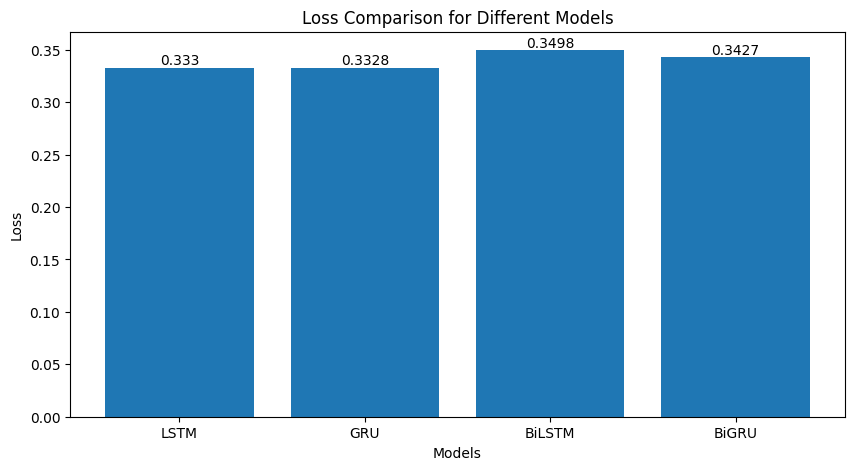

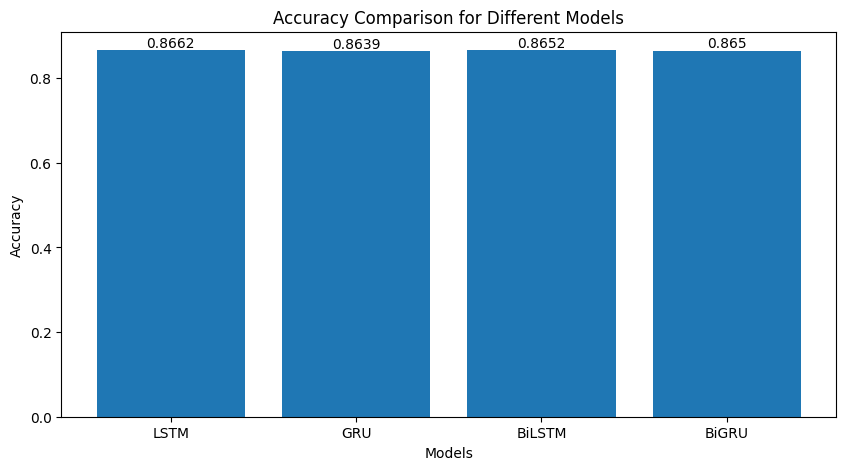

In [70]:
# prompt: visualize metrics as barplots, annotate

import matplotlib.pyplot as plt


model_names = list(metrics.keys())
loss_values = [m[0] for m in metrics.values()]
accuracy_values = [m[1] for m in metrics.values()]

# Create bar plot for loss
plt.figure(figsize=(10, 5))
plt.bar(model_names, loss_values)
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Loss Comparison for Different Models")

# Annotate bars with loss values
for i, v in enumerate(loss_values):
  plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.show()

# Create bar plot for accuracy
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracy_values)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison for Different Models")

# Annotate bars with accuracy values
for i, v in enumerate(accuracy_values):
  plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.show()



# Export as pdf

In [73]:


import os

def convert_ipynb_to_pdf(ipynb_path, pdf_path):
    """Converts an ipynb file to a PDF using nbexport.

    Args:
        ipynb_path: Path to the ipynb file.
        pdf_path: Path to save the PDF file.
    """

    os.system(f"nbexport '{ipynb_path}' --to pdf --output '{pdf_path}'")

# Example usage: replace with your file path
ipynb_file = 'file.ipynb'
pdf_file = 'exported_notebook.pdf'

convert_ipynb_to_pdf(ipynb_file, pdf_file)

# Download the pdf file
from google.colab import files
files.download(pdf_file)


FileNotFoundError: Cannot find file: exported_notebook.pdf

[NbConvertApp] Converting notebook file.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'file.ipynb'
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/templateexporter.py", line 390, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/exporter.py", line 201, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nbconvert/exporters/templateexporter.py", line 396, in from_file
    return super().from_file(file_s